# **決定木分析（回帰）：dtreeviz**
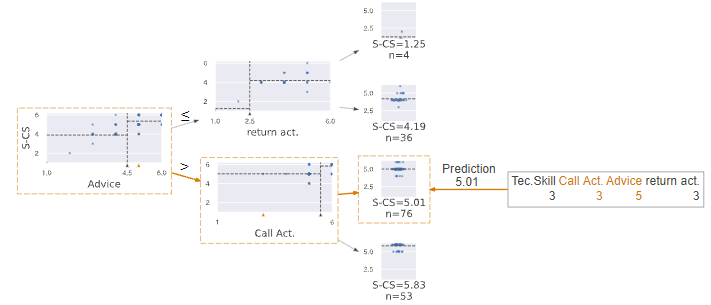


##**説明**
これは、**Google Colab専用**の決定木分析（回帰）の自動機械学習ツールです。

1.   まず、ランタイム → すべてのセルを実行 してください。
2.   つぎに「2.ファイル読込み」に移動してください。ライブラリのインポートが完了すると [ファイル選択] ボタンが表示されますので、ボタンをクリックし、csvファイルを指定してください。\
※データ形式は、以下の事前準備参照
3.   「3.決定木（木の深さ2,3,4）」に移動すると、木の深さ毎の決定木が確認できます。（※depth2.svg,depth3.svg,depth4.svg データとしても出力します）
**→ 可読性がよいと判断した深さの決定木にて、データの構造を読み取ってみましょう**

***
##**事前準備**
*   読込みデータは**csv**です。以下のようにX(説明変数)を並べた後、最終列にy(目的変数)を配置したデータとしてください。

>|X1 |X2 |X3 |X4 |X5 |X6 |X7 |・・・|y |
|---|---|---|---|---|---|---|---|---|
|5 |2 |3 |  |  |  |  |  |12|
|4 |5 |8 |　|  |  |  |  |18|

*   データは**数値データ**としてください。
*   カラム名が日本語の場合、文字化けします。**カラム名は英字に変更**しておいてください。

※欠損値があれば、その行は取り除いて分析します。


# **1．ライブラリのインストールとインポート**

In [1]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 8.3 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=794fe4b76ab9948095b2778827168cdb25678d32b474e606b959485412ac4244
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
# Import required libraries 
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import japanize_matplotlib 
import seaborn as sns 
sns.set(font="IPAexGothic")  
from scipy.stats import norm

In [3]:
pip install graphviz

In [4]:
pip install dtreeviz

     |████████████████████████████████| 61 kB 557 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=f85f233f2cc936e0e270b3411d2a9248fb4f2597b252aaf938089ab0041b895e
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz


In [5]:
pip install -U yellowbrick

     |████████████████████████████████| 271 kB 11.6 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [6]:
from sklearn import tree
from dtreeviz.trees import *
import graphviz
import yellowbrick
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
import warnings
warnings.filterwarnings('ignore')

# **2．ファイル読込み**
**★<font color= "Crimson"> [ファイル選択] </font>ボタンにて決定木分析したいcsvファイルを選択してください**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving CS_train.csv to CS_train.csv


## データ処理

In [8]:
if len(uploaded.keys()) != 1:
    print("アップロードは１ファイルにのみ限ります")
else:
    target = list(uploaded.keys())[0]

In [9]:
df = pd.read_csv(target)

In [10]:
# 欠損値のある行を削除（※ how ='any' は欠損がひとつでもあれば、その行を削除）
df = df.dropna(how='any')

In [11]:
#数値の列は残し、文字列だけを削除
df = df.select_dtypes(exclude='object')

In [12]:
df

,Tec.Skill,Complain Act.,Call Act.,Visit number,Advice,return act.,QA,S-CS
0,6,6,6,6,6,6,6,6
1,6,6,6,6,6,6,6,6
2,6,6,5,5,6,5,5,6
3,4,4,4,4,4,4,4,4
4,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...
164,6,6,6,5,6,6,4,6
165,5,5,5,5,5,5,5,5
166,6,5,6,5,5,6,5,6
167,5,4,4,4,4,4,4,4


In [13]:
FEATURES = df.columns[:-1]
TARGET = df.columns[-1]

X = df.loc[:, FEATURES]
y = df.loc[:, TARGET]

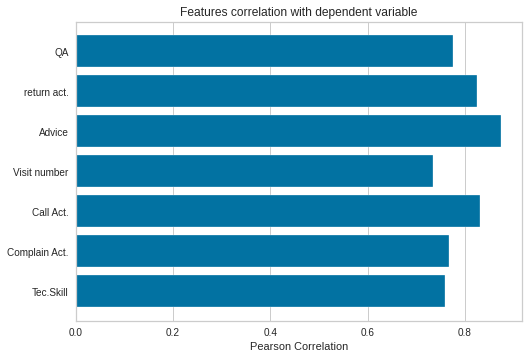

In [14]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels=X.columns)
visualizer.fit(X, y) 
visualizer.poof();

# **3．決定木（木の深さ2,3,4）**
決定木は木の深さが増すほど解釈や説明はむつかしく、シンプルなほど解釈はしやすい。以下では比較的解釈が容易な深さ2,3,4の決定木を描かせている。
*   #orientation='LR' の # を消すと、決定木の表示は横向きになる
*   予測したいXの値を X=[X1,X2,X3,X4,…] に設定すれば、予測値が表示される

##**決定木：木の深さ2**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


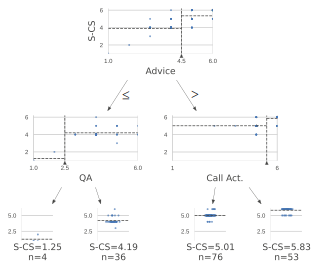

In [15]:
#決定木分析と出力
dtree = tree.DecisionTreeRegressor(max_depth=2)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR'
               #X = [3,3,5,3]
              )

viz

In [16]:
viz.save("depth2.svg")

## **決定木：木の深さ3**

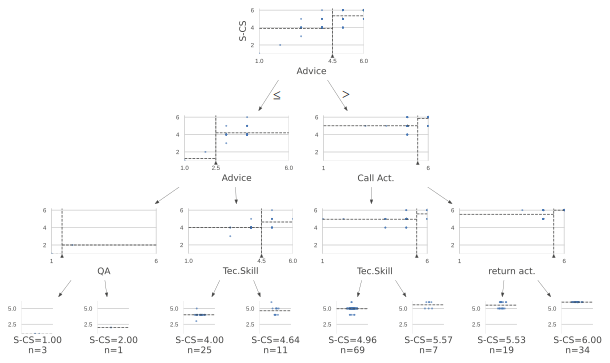

In [17]:
#決定木分析と出力
dtree = tree.DecisionTreeRegressor(max_depth=3)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               #X = [3,3,5,3]
              )

viz

In [18]:
viz.save("depth3.svg")

## **決定木：木の深さ4**

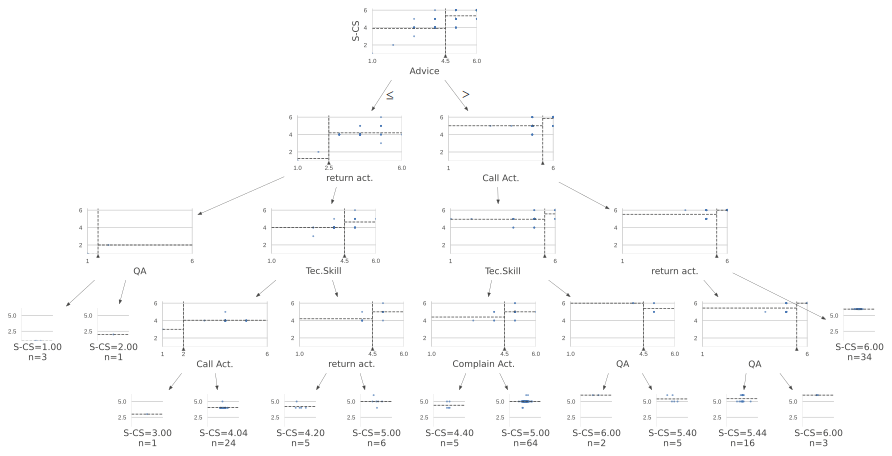

In [19]:
#決定木分析と出力
dtree = tree.DecisionTreeRegressor(max_depth=4)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               #X = [3,3,5,3]
              )

viz

In [20]:
viz.save("depth4.svg")

# **備考**

## **決定木（デシジョンツリー）について**
ある対象や課題を分類・予測・判定するための条件分岐のアルゴリズムを図式化した木構造のグラフ。意思決定や戦略立案のほか、機械学習やデータマイニングの分野で用いられる。ある要素（親ノード）を起点として想定しうる結果を複数の要素（子ノード）の枝分かれで表し、条件分岐を繰り返したもの。木構造で表現できるので非常に可読性が高い。

 *   **dtreeviz**　：https://github.com/parrt/dtreeviz